In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("Student Depression Dataset.csv")


In [4]:
print(df.describe(include="all"))

                   id Gender           Age    City Profession  \
count    27901.000000  27901  27901.000000   27901      27901   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15547           NaN    1570      27870   
mean     70442.149421    NaN     25.822300     NaN        NaN   
std      40641.175216    NaN      4.905687     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35039.000000    NaN     21.000000     NaN        NaN   
50%      70684.000000    NaN     25.000000     NaN        NaN   
75%     105818.000000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count        27901.000000   27901.000000  27901.000000        27901.000000   
unique                NaN            NaN           NaN         

In [5]:
%pip install seaborn

Matplotlib is building the font cache; this may take a moment.


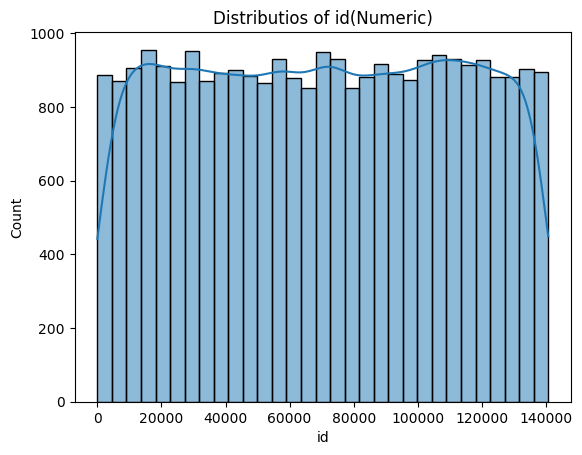

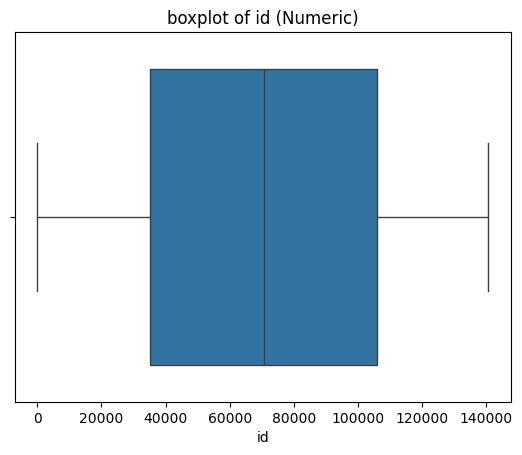

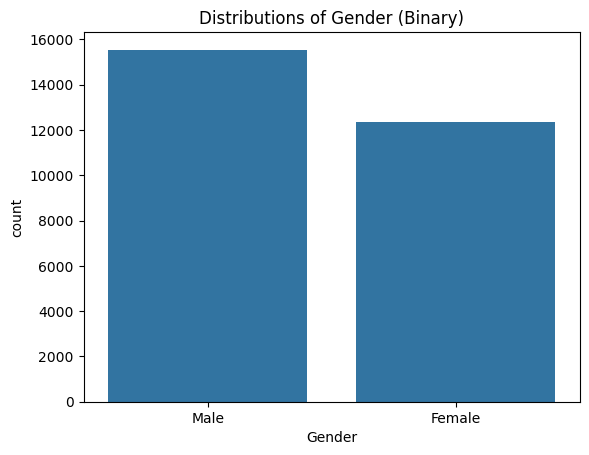

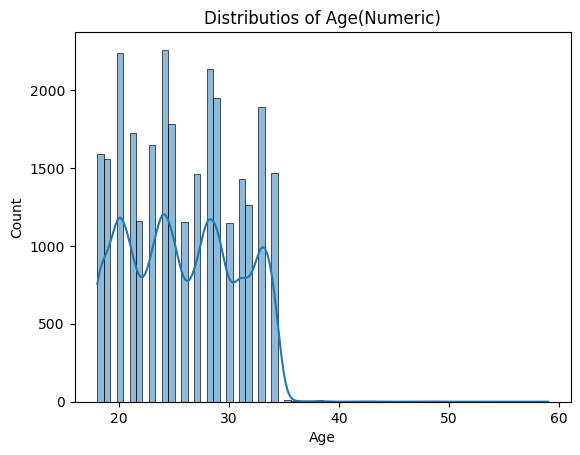

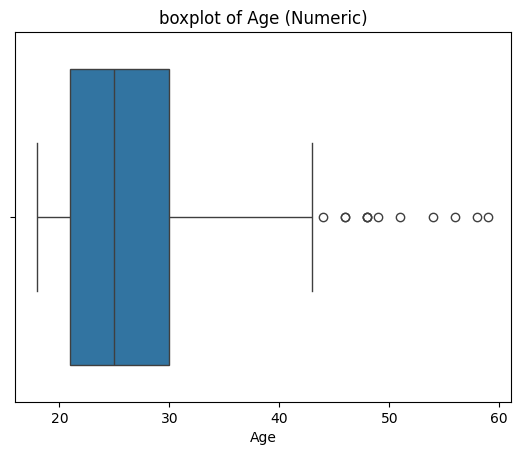

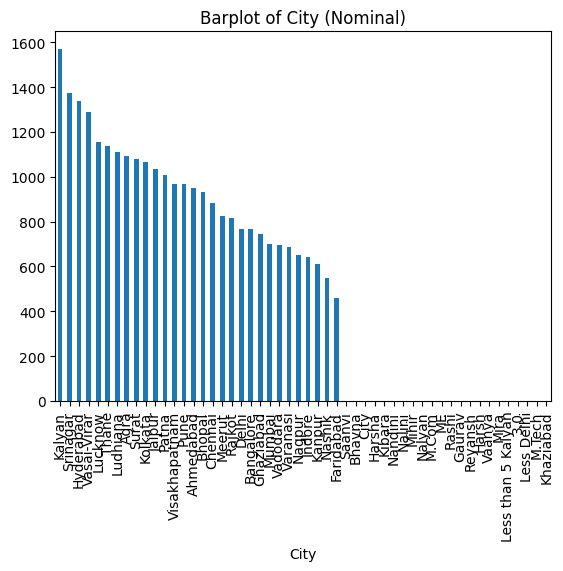

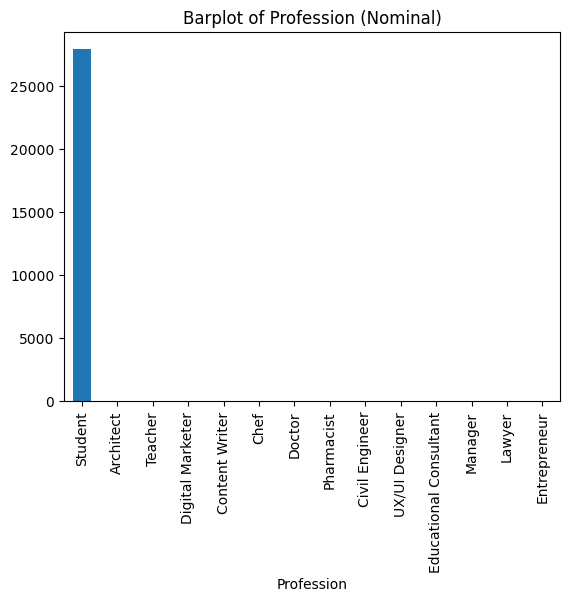

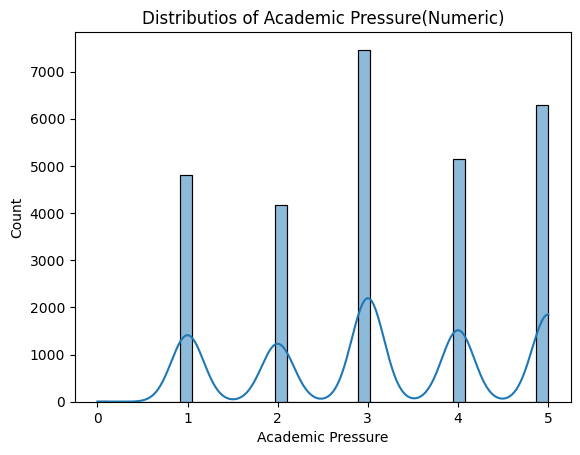

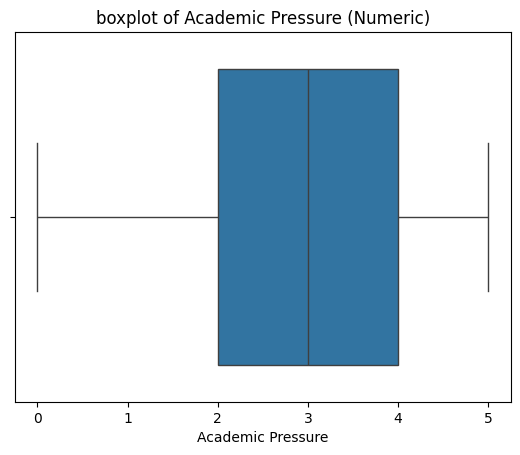

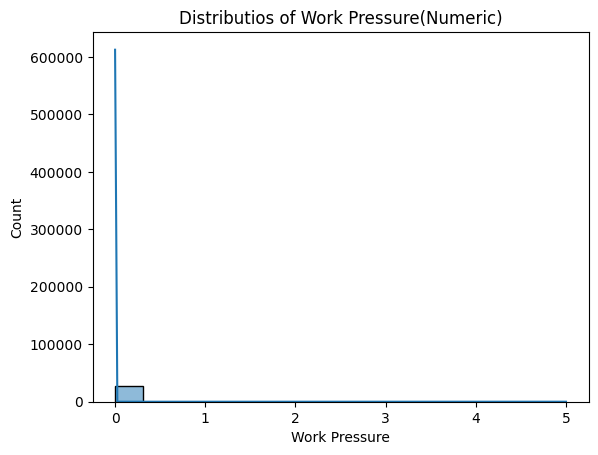

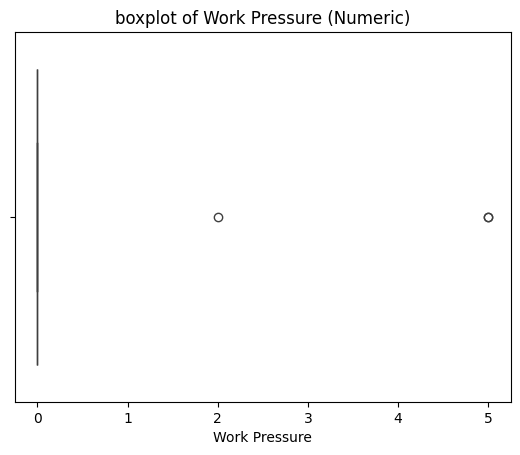

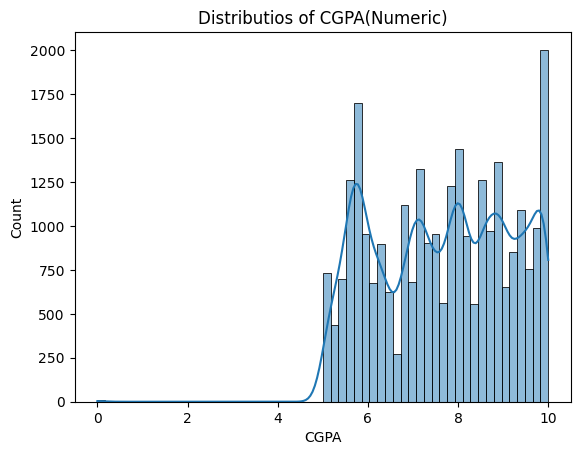

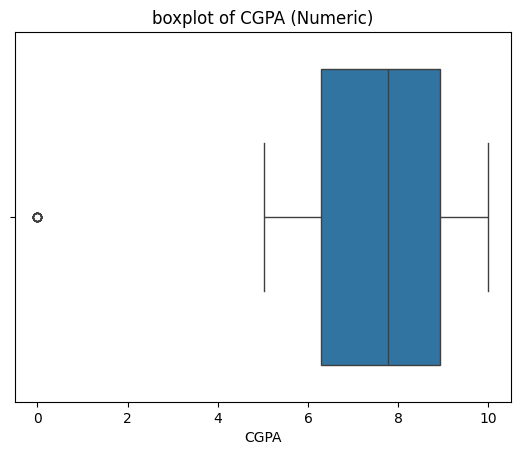

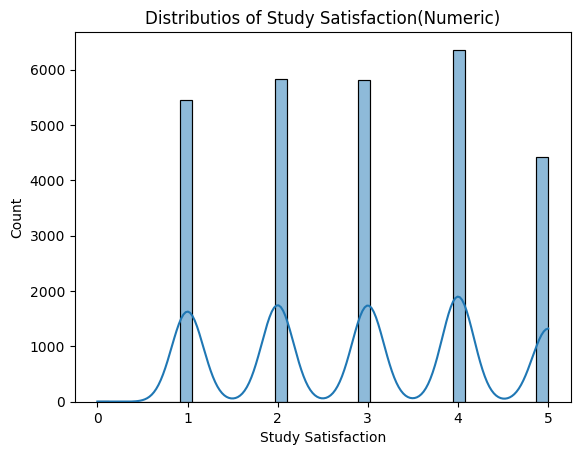

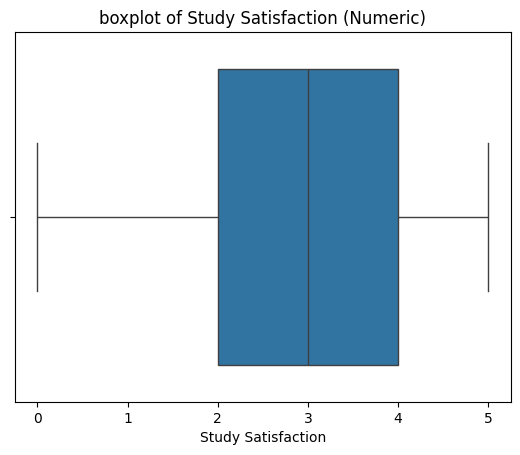

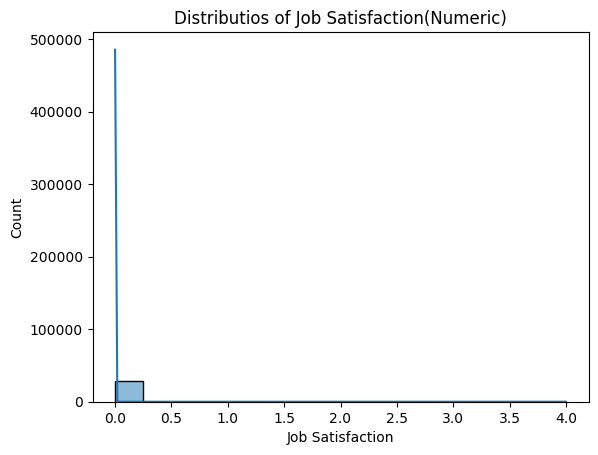

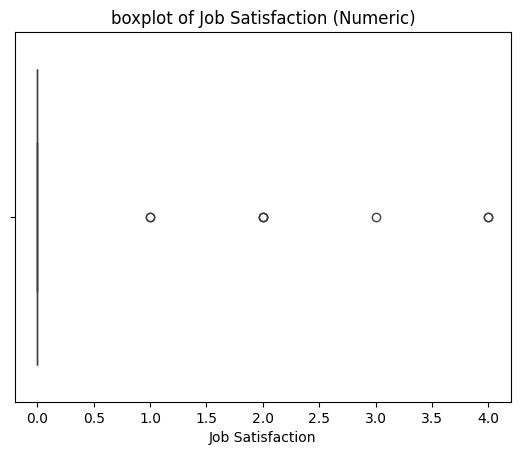

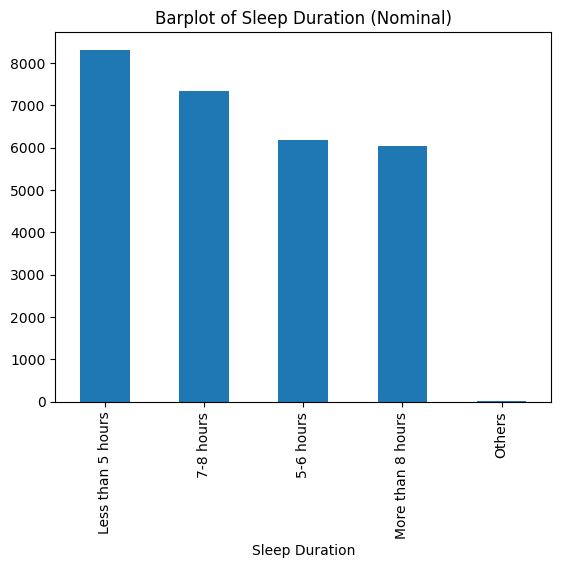

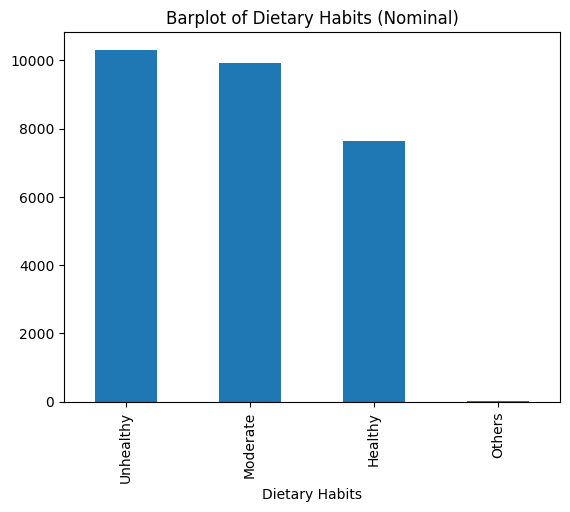

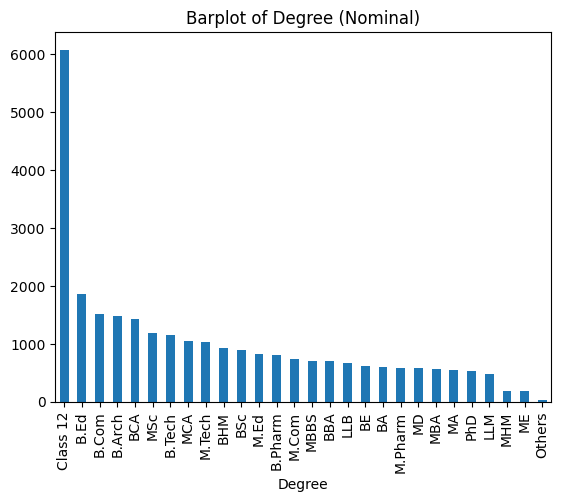

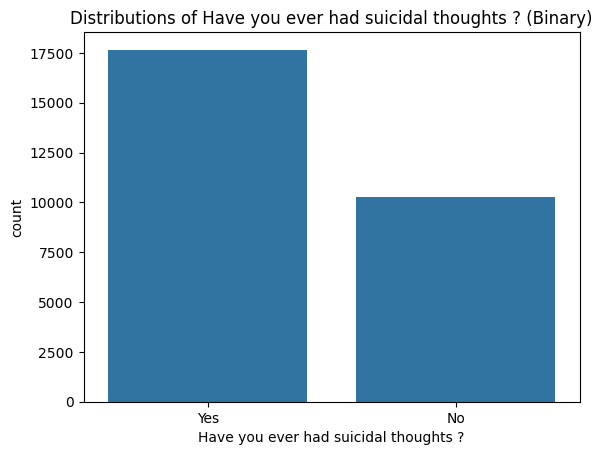

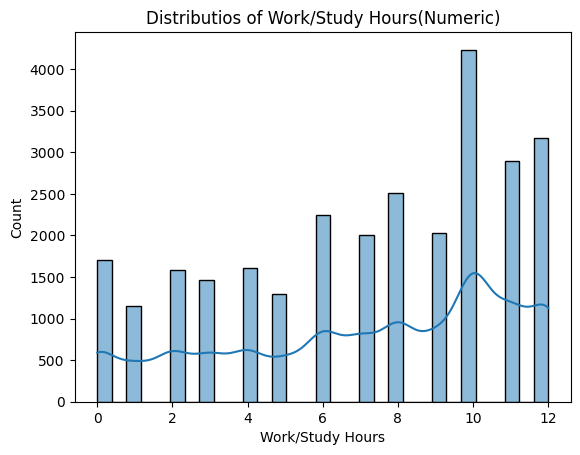

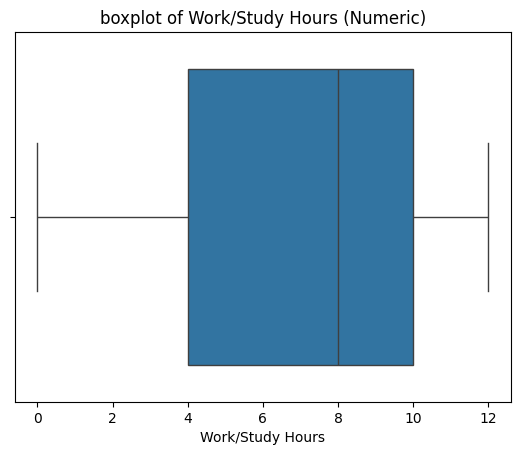

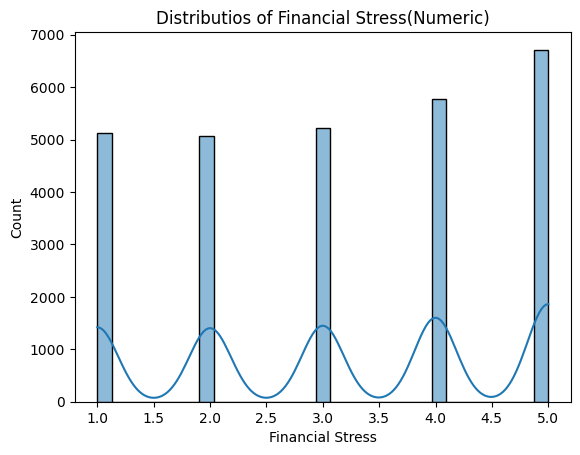

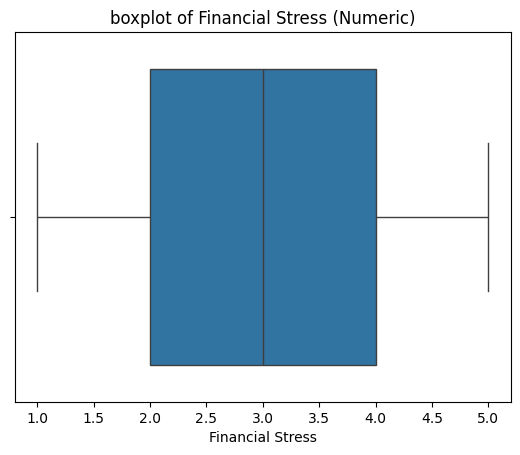

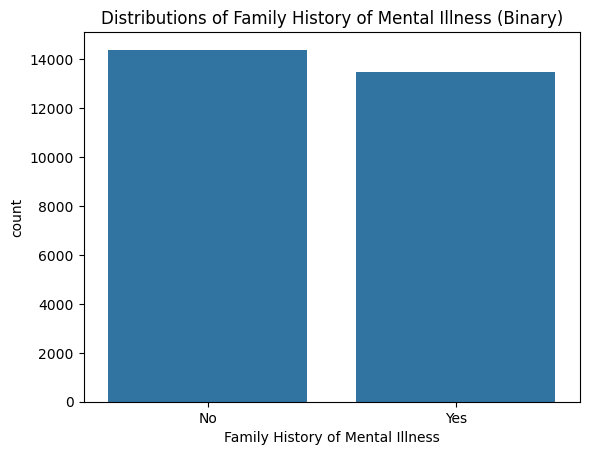

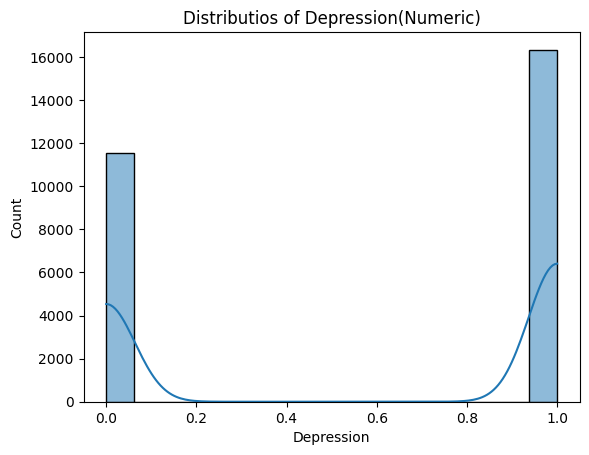

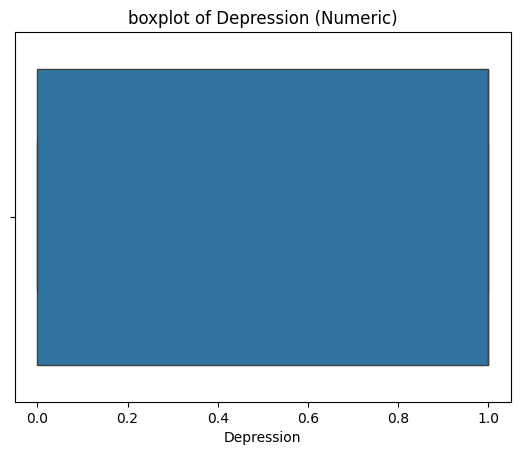

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
def create_visualization(df,col):
    if df[col].dtype=="object":
        if df[col].nunique()==2:
            sns.countplot(x=df[col],data=df)
            plt.title(f"Distributions of {col} (Binary)")
        else:
            df[col].value_counts().plot(kind="bar")
            plt.title(f"Barplot of {col} (Nominal)")
    elif df[col].dtype in ['int64','float64']:
        sns.histplot(x=df[col],kde=True)
        plt.title(f"Distributios of {col}(Numeric)")
        plt.show()

        sns.boxplot(x=df[col])
        plt.title(f"boxplot of {col} (Numeric)")
    plt.show()
for col in df.columns:
    create_visualization(df,col)
        

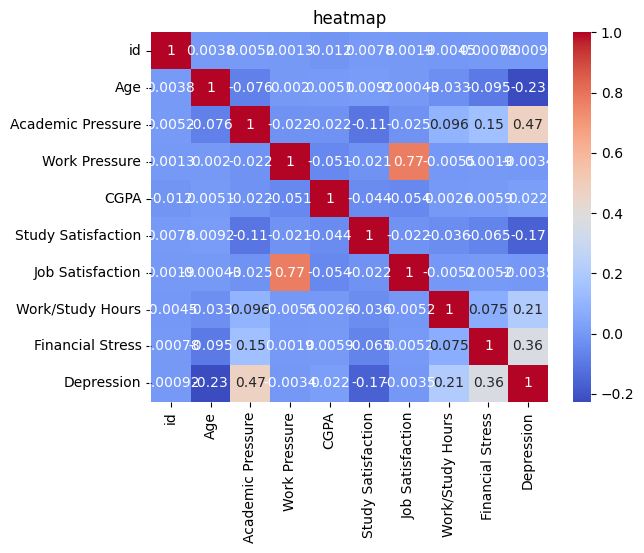

In [7]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("heatmap")
plt.show()

In [8]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [9]:
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].fillna(df[col].mode()[0])
for col in df.select_dtypes(include='number').columns:
    df[col]=df[col].fillna(df[col].median())
    

In [10]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [11]:
numerical_col=df.select_dtypes(include='number').columns
Q1=df[numerical_col].quantile(0.25)
Q3=df[numerical_col].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outliers=((df[numerical_col]<lower)| (df[numerical_col]>upper))
if outliers.any().any():
    print("outliers detected and removed ")
    df=df[~outliers.any(axis=1)]
else:
    print("no utliers")

outliers detected and removed 


In [32]:
df.shape


(27878, 18)

In [9]:
from sklearn.preprocessing import MinMaxScaler
normalizer=MinMaxScaler()
numerical_col=df.select_dtypes(include='number').columns            # only needed i this dataset no need
df[numerical_col]=normalizer.fit_transform(df[numerical_col])
print("normalized data:")
print(df[numerical_col])

normalized data:
             id   Age  Academic Pressure  Work Pressure      CGPA  \
0      0.000000  0.60                1.0            0.0  0.792757   
1      0.000043  0.24                0.4            0.0  0.175050   
2      0.000171  0.52                0.6            0.0  0.402414   
3      0.000199  0.40                0.6            0.0  0.112676   
4      0.000213  0.28                0.8            0.0  0.623742   
...         ...   ...                ...            ...       ...   
27896  0.999900  0.36                1.0            0.0  0.144869   
27897  0.999908  0.36                0.4            0.0  0.879276   
27898  0.999929  0.52                0.6            0.0  0.317907   
27899  0.999936  0.00                1.0            0.0  0.372233   
27900  1.000000  0.36                0.8            0.0  0.847082   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
0                     0.4               0.0          0.250000   
1                     1.

standardized data:


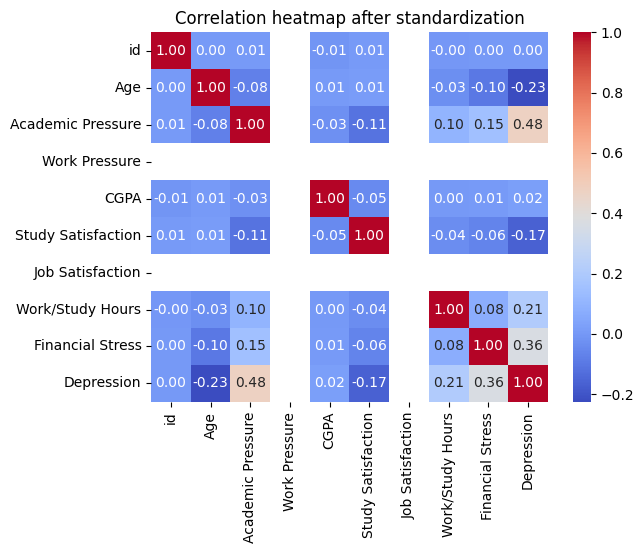

In [12]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

scaler=StandardScaler()
numerical_col=df.select_dtypes(include='number').columns
df_scaled_array=scaler.fit_transform(df[numerical_col])
print("standardized data:")
df_scaled=pd.DataFrame(df_scaled_array,columns=numerical_col)
sns.heatmap(df_scaled.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap after standardization")
plt.show()

In [13]:
corr_matrix=df_scaled.corr()
target_corr=corr_matrix["Depression"]
selected_features=target_corr[abs(target_corr)>0.2].drop("Depression").index.tolist()
print(selected_features)

['Age', 'Academic Pressure', 'Work/Study Hours', 'Financial Stress']


In [29]:
from sklearn.model_selection import train_test_split
x=df_scaled[selected_features]

df["Depression"] = df["Depression"].replace({'Yes': 1, 'No': 0}).astype("int64")

print(df["Depression"].dtype)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

int64


In [42]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.000000,Male,0.60,Visakhapatnam,Student,1.0,0.0,0.792757,0.4,0.0,5-6 hours,Healthy,B.Pharm,Yes,0.250000,0.00,No,1
1,0.000043,Female,0.24,Bangalore,Student,0.4,0.0,0.175050,1.0,0.0,5-6 hours,Moderate,BSc,No,0.250000,0.25,Yes,0
2,0.000171,Male,0.52,Srinagar,Student,0.6,0.0,0.402414,1.0,0.0,Less than 5 hours,Healthy,BA,No,0.750000,0.00,Yes,0
3,0.000199,Female,0.40,Varanasi,Student,0.6,0.0,0.112676,0.4,0.0,7-8 hours,Moderate,BCA,Yes,0.333333,1.00,Yes,1
4,0.000213,Female,0.28,Jaipur,Student,0.8,0.0,0.623742,0.6,0.0,5-6 hours,Moderate,M.Tech,Yes,0.083333,0.00,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.999900,Female,0.36,Surat,Student,1.0,0.0,0.144869,1.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,0.583333,0.00,Yes,0
27897,0.999908,Male,0.36,Ludhiana,Student,0.4,0.0,0.879276,0.6,0.0,Less than 5 hours,Healthy,MSc,No,0.000000,0.50,Yes,0
27898,0.999929,Male,0.52,Faridabad,Student,0.6,0.0,0.317907,0.8,0.0,5-6 hours,Unhealthy,MD,No,1.000000,0.25,No,0
27899,0.999936,Female,0.00,Ludhiana,Student,1.0,0.0,0.372233,0.4,0.0,Less than 5 hours,Healthy,Class 12,Yes,0.833333,1.00,No,1


In [40]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.000000,Male,0.60,Visakhapatnam,Student,1.0,0.0,0.792757,0.4,0.0,5-6 hours,Healthy,B.Pharm,Yes,0.250000,0.00,No,1.0
1,0.000043,Female,0.24,Bangalore,Student,0.4,0.0,0.175050,1.0,0.0,5-6 hours,Moderate,BSc,No,0.250000,0.25,Yes,0.0
2,0.000171,Male,0.52,Srinagar,Student,0.6,0.0,0.402414,1.0,0.0,Less than 5 hours,Healthy,BA,No,0.750000,0.00,Yes,0.0
3,0.000199,Female,0.40,Varanasi,Student,0.6,0.0,0.112676,0.4,0.0,7-8 hours,Moderate,BCA,Yes,0.333333,1.00,Yes,1.0
4,0.000213,Female,0.28,Jaipur,Student,0.8,0.0,0.623742,0.6,0.0,5-6 hours,Moderate,M.Tech,Yes,0.083333,0.00,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.999900,Female,0.36,Surat,Student,1.0,0.0,0.144869,1.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,0.583333,0.00,Yes,0.0
27897,0.999908,Male,0.36,Ludhiana,Student,0.4,0.0,0.879276,0.6,0.0,Less than 5 hours,Healthy,MSc,No,0.000000,0.50,Yes,0.0
27898,0.999929,Male,0.52,Faridabad,Student,0.6,0.0,0.317907,0.8,0.0,5-6 hours,Unhealthy,MD,No,1.000000,0.25,No,0.0
27899,0.999936,Female,0.00,Ludhiana,Student,1.0,0.0,0.372233,0.4,0.0,Less than 5 hours,Healthy,Class 12,Yes,0.833333,1.00,No,1.0


In [15]:
features = ['Age', 'Academic Pressure', 'Work/Study Hours', 'Financial Stress']
X = df[features]
y = df["Depression"].replace({'Yes': 1, 'No': 0}).astype(int)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(
     accuracy_score,precision_score,recall_score,
    f1_score,roc_auc_score,classification_report,roc_curve
) 
import matplotlib.pyplot as plt






features_all=['Age','Academic Pressure', 'Work/Study Hours','Financial Stress']
features_subset=['Academic Pressure', 'Financial Stress']
df=df.dropna()
x1=df[features_all]
x2=df[features_subset]
y1=df["Depression"]
y2=df["Depression"]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=42)
scaler1=StandardScaler()
x1_train_scaled=scaler1.fit_transform(x1_train)
x1_test_scaled=scaler1.fit_transform(x1_test)
scaler2=StandardScaler()
x2_train_scaled=scaler2.fit_transform(x2_train)
x2_test_scaled=scaler2.fit_transform(x2_test)
model1=LogisticRegression()
model2=LogisticRegression(max_iter=1000,solver='saga')
model1.fit(x1_train_scaled,y1_train)
model2.fit(x2_train_scaled,y2_train)
y1_pre=model1.predict(x1_test_scaled)
y2_pre=model2.predict(x2_test_scaled)
y_pro1=model1.predict_proba(x1_test_scaled)[:,1]
y_pro2=model2.predict_proba(x2_test_scaled)[:,1]
print("model1 (ALL Features)")
print(classification_report(y1_test,y1_pre))
print("model2 (all Features)")
print(classification_report(y2_test,y2_pre))
accuracy_score1=accuracy_score(y1_test,y1_pre)
print("Model1 accuracy:",accuracy_score1)
accuracy_score2=accuracy_score(y2_test,y1_pre)
print("model2 accuracy:",accuracy_score2)
print(len(y_test), len(y_pro1), len(y_pro2))
# Ensure the length of y_pro1 and y_test match
#y_test = y_test[:len(y_pro1)]  # or, if needed, truncate y_pro1 to match y_test

fpr1, tpr1, thresholds = roc_curve(y1_test, y_pro1)
fpr2,tpr2, threshold =roc_curve(y2_test,y_pro2)
auc1 = roc_auc_score(y_test, y_pro1)
auc2 = roc_auc_score(y_test, y_pro2)
plt.figure(figsize=(8,6))
plt.plot(fpr1,tpr1,label=f'Model 1 (AUC ={auc1:.2f})')
plt.plot(fpr2,tpr2,label=f'Model 2 (AUC ={auc2:.2f})')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.grid(True)
plt.show()
mlp1=MLPClassifier(hidden_layer_sizes=(100,50),
                   activation='relu',
                   solver='adam',
                   alpha=0.001,
                   batch_size=32,
                   learning_rate_init=0.001,
                   max_iter=200,
                   early_stopping=True,
                   validation_fraction=0.1,
                   random_state=42)
mlp1.fit(x1_train_scaled,y1_train)
mlp2=MLPClassifier(hidden_layer_sizes=(120,70),
                   activation='relu',
                   solver='adam',
                   alpha=0.001,
                   batch_size=32,
                   learning_rate_init=0.001,
                   max_iter=200,
                   early_stopping=True,
                   validation_fraction=0.1,
                   random_state=42)
mlp2.fit(x2_train_scaled,y2_train)

y1_pred=mlp1.predict(x1_test_scaled)
accuracy1=accuracy_score(y1_test,y1_pred)
confusion_matrix1=confusion_matrix(y1_test,y1_pred)
class_report1=classification_report(y1_test,y1_pred)
print(accuracy1)
print(confusion_matrix1)
print(class_report1)
plt.figure(figsize=(10,6))
plt.plot(mlp1.loss_curve_)
plt.title("Loss curve of model 1 ")
plt.xlabel("Itrations")
plt.ylabel("loss")
plt.grid(True)
plt.show()
y2_pred=mlp2.predict(x2_test_scaled)
accuracy2=accuracy_score(y2_test,y2_pred)
confusion_matrix2=confusion_matrix(y2_test,y2_pred)
class_report2=classification_report(y2_test,y2_pred)
print(accuracy2)
print(confusion_matrix2)
print(class_report2)
plt.figure(figsize=(10,6))
plt.plot(mlp2.loss_curve_)
plt.title("Loss curve of model 2 ")
plt.xlabel("Itrations")
plt.ylabel("loss")
plt.grid(True)
plt.show()

model1 (ALL Features)
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      2316
           1       0.80      0.84      0.82      3260

    accuracy                           0.79      5576
   macro avg       0.78      0.78      0.78      5576
weighted avg       0.79      0.79      0.79      5576

model2 (all Features)
              precision    recall  f1-score   support

           0       0.74      0.67      0.71      2316
           1       0.78      0.83      0.81      3260

    accuracy                           0.77      5576
   macro avg       0.76      0.75      0.76      5576
weighted avg       0.76      0.77      0.76      5576

Model1 accuracy: 0.7878407460545194
model2 accuracy: 0.7878407460545194


5576 5576 5576


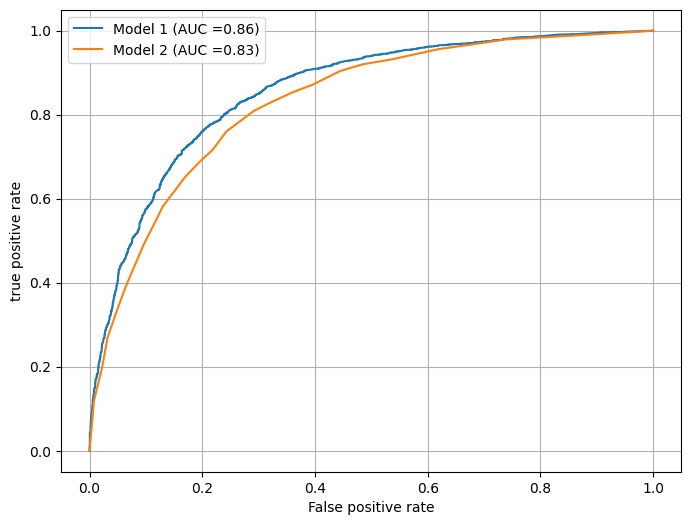

In [28]:
print(len(y_test), len(y_pro1), len(y_pro2))
# Ensure the length of y_pro1 and y_test match
#y_test = y_test[:len(y_pro1)]  # or, if needed, truncate y_pro1 to match y_test

fpr1, tpr1, thresholds = roc_curve(y1_test, y_pro1)
fpr2,tpr2, threshold =roc_curve(y2_test,y_pro2)
auc1 = roc_auc_score(y_test, y_pro1)
auc2 = roc_auc_score(y_test, y_pro2)
plt.figure(figsize=(8,6))
plt.plot(fpr1,tpr1,label=f'Model 1 (AUC ={auc1:.2f})')
plt.plot(fpr2,tpr2,label=f'Model 2 (AUC ={auc2:.2f})')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.grid(True)
plt.show()
mlp1=MLPClassifier(hidden_layer_sizes=(100,50),
                   activation='relu',
                   solver='adam',
                   alpha=0.001,
                   batch_size=32,
                   learning_rate_init=0.001,
                   max_iter=200,
                   early_stopping=True,
                   validation_fraction=0.1,
                   random_state=42)
mlp1.fit(x1_train_scaled,y1_train)
mlp2=MLPClassifier(hidden_layer_sizes=(120,70),
                   activation='relu',
                   solver='adam',
                   alpha=0.001,
                   batch_size=32,
                   learning_rate_init=0.001,
                   max_iter=200,
                   early_stopping=True,
                   validation_fraction=0.1,
                   random_state=42)
mlp2.fit(x2_train_scaled,y2_train)

y1_pred=mlp1.predict(x1_test_scaled)
accuracy1=accuracy_score(y1_test,y1_pred)
confusion_matrix1=confusion_matrix(y1_test,y1_pred)
class_report1=classification_report(y1_test,y1_pred)
print(accuracy1)
print(confusion_matrix1)
print(class_report1)
plt.figure(figsize=(10,6))
plt.plot(mlp1.loss_curve_)
plt.title("Loss curve of model 1 ")
plt.xlabel("Itrations")
plt.ylabel("loss")
plt.grid(True)
plt.show()
y2_pred=mlp2.predict(x2_test_scaled)
accuracy2=accuracy_score(y2_test,y2_pred)
confusion_matrix2=confusion_matrix(y2_test,y2_pred)
class_report2=classification_report(y2_test,y2_pred)
print(accuracy2)
print(confusion_matrix2)
print(class_report2)
plt.figure(figsize=(10,6))
plt.plot(mlp2.loss_curve_)
plt.title("Loss curve of model 2 ")
plt.xlabel("Itrations")
plt.ylabel("loss")
plt.grid(True)
plt.show()

0.7860089686098655
[[1626  698]
 [ 495 2756]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2324
           1       0.80      0.85      0.82      3251

    accuracy                           0.79      5575
   macro avg       0.78      0.77      0.78      5575
weighted avg       0.78      0.79      0.78      5575



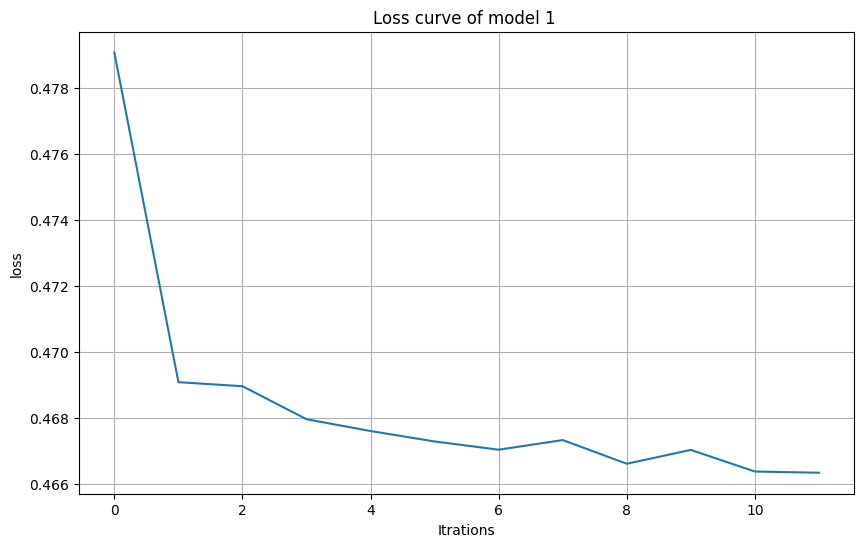

0.7648430493273543
[[1487  837]
 [ 474 2777]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      2324
           1       0.77      0.85      0.81      3251

    accuracy                           0.76      5575
   macro avg       0.76      0.75      0.75      5575
weighted avg       0.76      0.76      0.76      5575



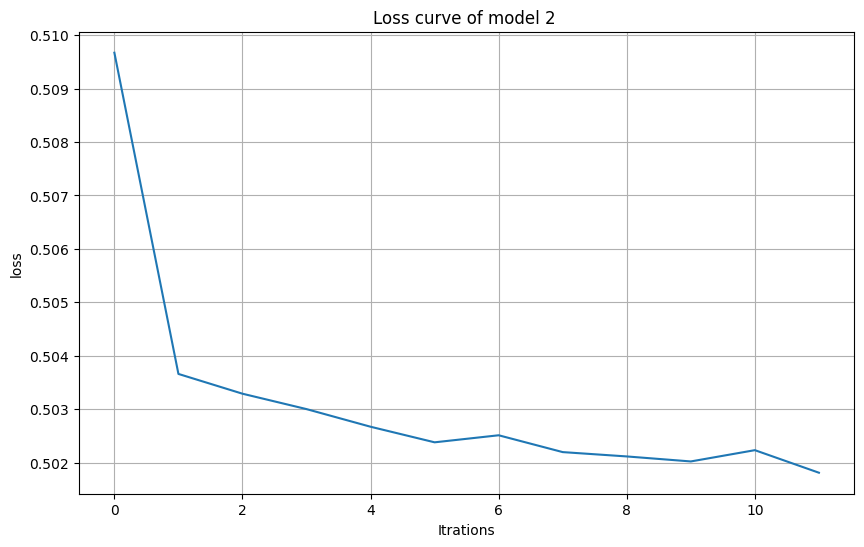

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features_all=['Age','Academic Pressure', 'Work/Study Hours','Financial Stress']
features_subset=['Academic Pressure', 'Financial Stress']
df=df.dropna()
x1=df[features_all]
x2=df[features_subset]
y1=df["Depression"]
y2=df["Depression"]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=42)
scaler1=StandardScaler()
x1_train_scaled=scaler1.fit_transform(x1_train)
x1_test_scaled=scaler1.fit_transform(x1_test)
scaler1=StandardScaler()
x2_train_scaled=scaler1.fit_transform(x2_train)
x2_test_scaled=scaler1.fit_transform(x2_test)
mlp1=MLPClassifier(hidden_layer_sizes=(100,50),
                   activation='relu',
                   solver='adam',
                   alpha=0.001,
                   batch_size=32,
                   learning_rate_init=0.001,
                   max_iter=200,
                   early_stopping=True,
                   validation_fraction=0.1,
                   random_state=42)
mlp1.fit(x1_train_scaled,y1_train)
mlp2=MLPClassifier(hidden_layer_sizes=(120,70),
                   activation='relu',
                   solver='adam',
                   alpha=0.001,
                   batch_size=32,
                   learning_rate_init=0.001,
                   max_iter=200,
                   early_stopping=True,
                   validation_fraction=0.1,
                   random_state=42)
mlp2.fit(x2_train_scaled,y2_train)

y1_pred=mlp1.predict(x1_test_scaled)
accuracy1=accuracy_score(y1_test,y1_pred)
confusion_matrix1=confusion_matrix(y1_test,y1_pred)
class_report1=classification_report(y1_test,y1_pred)
print(accuracy1)
print(confusion_matrix1)
print(class_report1)
plt.figure(figsize=(10,6))
plt.plot(mlp1.loss_curve_)
plt.title("Loss curve of model 1 ")
plt.xlabel("Itrations")
plt.ylabel("loss")
plt.grid(True)
plt.show()
y2_pred=mlp2.predict(x2_test_scaled)
accuracy2=accuracy_score(y2_test,y2_pred)
confusion_matrix2=confusion_matrix(y2_test,y2_pred)
class_report2=classification_report(y2_test,y2_pred)
print(accuracy2)
print(confusion_matrix2)
print(class_report2)
plt.figure(figsize=(10,6))
plt.plot(mlp2.loss_curve_)
plt.title("Loss curve of model 2 ")
plt.xlabel("Itrations")
plt.ylabel("loss")
plt.grid(True)
plt.show()